# Harikrishnan U S
# R7B - 365



80134624/80134624 [==============================] - 8s 0us/step

Epoch 1/5


938/938 [==============================] - 503s 535ms/step - loss: 0.3157 - accuracy: 0.9098 - val_loss: 0.1422 - val_accuracy: 0.9572
Epoch 2/5
938/938 [==============================] - 459s 489ms/step - loss: 0.1349 - accuracy: 0.9574 - val_loss: 0.1106 - val_accuracy: 0.9664
Epoch 3/5
938/938 [==============================] - 464s 495ms/step - loss: 0.1139 - accuracy: 0.9635 - val_loss: 0.1010 - val_accuracy: 0.9690
Epoch 4/5
938/938 [==============================] - 459s 490ms/step - loss: 0.1008 - accuracy: 0.9681 - val_loss: 0.1043 - val_accuracy: 0.9661
Epoch 5/5
313/313 [==============================] - 68s 218ms/step - loss: 0.0888 - accuracy: 0.9719
Test Loss: 0.08879239857196808
Test Accuracy: 0.9718999862670898


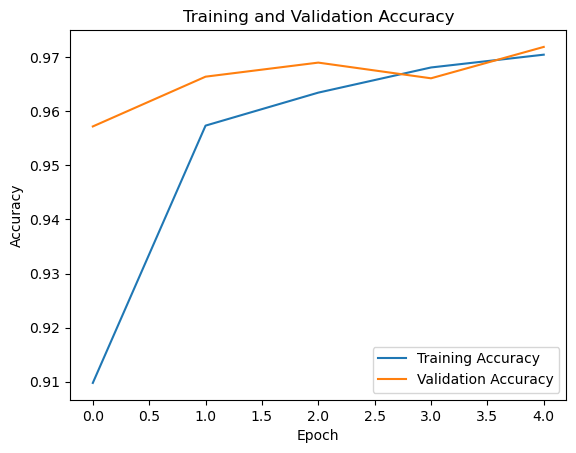

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications import VGG19
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 
train_images = train_images.reshape((60000, 28, 28, 1)) 
test_images = test_images.reshape((10000, 28, 28, 1)) 
train_images = train_images.astype('float32') / 255 
test_images = test_images.astype('float32') / 255 
train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels) 

# Replicate the singLe-channeL image across three channels 
train_images_rgb = np.repeat(train_images, 3, axis=-1) 
test_images_rgb = np.repeat(test_images, 3, axis=-1) 

# Resize images to 32x32 
train_images_rgb_resized = tf.image.resize(train_images_rgb, (32, 32)) 
test_images_rgb_resized = tf.image.resize(test_images_rgb, (32, 32)) 

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model.layers: 
    layer.trainable = False 

# Create the model
model = models.Sequential() 
model.add(base_model) 
model.add( layers. Flatten()) 
model.add(layers.Dense(256, activation='relu')) 
model.add(layers.Dense(10, activation='softmax')) 

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images_rgb_resized, train_labels, validation_data=
                    (test_images_rgb_resized, test_labels), 
                    epochs=5, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(test_images_rgb_resized, test_labels)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 [==============================] - 99s 313ms/step


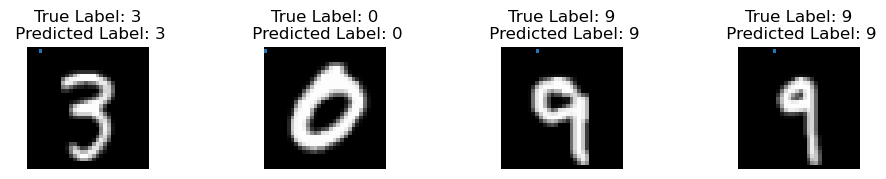

In [15]:
import random

predictions = model.predict(test_images_rgb_resized) 
start_index = random.randint(0, len(test_images_rgb_resized) - 1) 
num_images = 4 
class_names = [str(i) for i in range(10)] 
num_cols = 2 
num_rows = (num_images + num_cols - 1) // num_cols 
plt.figure(figsize=(12, 6)) 
for i in range(num_images): 
    plt.subplot(4, 5, i + 1) 
    plt.imshow(test_images_rgb_resized[start_index + i], cmap='gray') 
    plt.axis('off') 
    predicted_probabilities = predictions[start_index + i] 
    true_label = np.argmax(test_labels[start_index + i]) 
    predicted_label = np.argmax(predicted_probabilities)
    plt.bar(range(10), predicted_probabilities, tick_label=class_names) 
    plt.xlabel('Class') 
    plt.ylabel('Probability') 
    plt.title(f'True Label: {np.argmax(test_labels[start_index + i])}\n 
              Predicted Label: {np.argmax(predicted_probabilities)}')
plt.tight_layout() 
plt.show() 

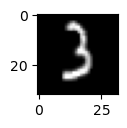

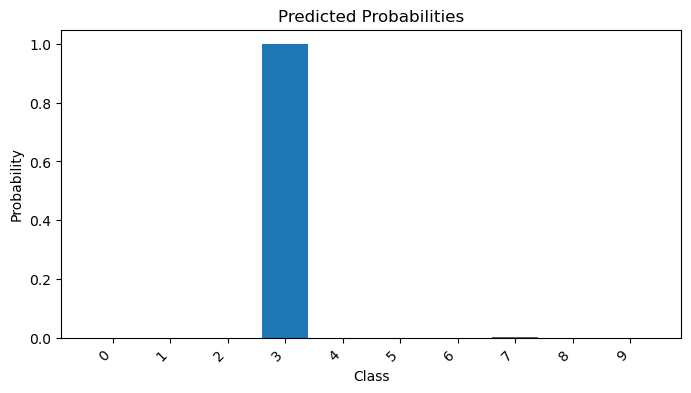

In [12]:
image_index=random.randint(0, len(test_images_rgb_resized) - 1) 
predicted_probabilities = predictions[image_index] 
true_label = np.argmax(test_labels[image_index]) 
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"] 
class_indices = list(range(10)) 
plt.subplot(4, 5, i + 1) 
plt.imshow(test_images_rgb_resized[image_index], cmap='gray') 
plt.figure(figsize=(8, 4)) 
plt.bar(class_indices, predicted_probabilities) 
plt.xticks(class_indices, class_names, rotation=45, ha='right') 
plt.xlabel('Class') 
plt.ylabel('Probability') 
plt.title(f'Predicted Probabilities') 
plt.show() 